In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
data = pd.read_csv('V:\internship XOPA\predictive analytics\predictive_salary_cat-mod-filled-nan1.csv', index_col=0)

In [4]:
data.head()

,last_com_salary,exp,exp_yr_count,salary,American,Male,Masters's Degree,PhD Degree,Job Boards,Referred by employees,...,Director,Frontend Engineer,Frontend Engineer II,Manager,Sr Backend Engineer,Sr Frontend Engineer,Sr Manager,Team Lead,Administration Department,Analytics Department
id,,,,,,,,,,,,,,,,,,,,,
1,84291,171,1,120925,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,84291,171,2,124947,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,84291,171,3,126961,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,84291,171,4,128977,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,84291,171,5,130995,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
data['last_com_salary'].fillna(0, inplace=True)
data['exp'].fillna(0, inplace=True)
data.fillna(0, inplace=True)

data.to_csv('predictive_salary_cat-mod-filled-nan.csv')

In [6]:
data1 = data.drop('salary', axis=1)
X = data.drop('salary', axis=1).values
Y = data['salary'].values

In [7]:
X2 = sm.add_constant(data1)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.521e+04
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:48:14   Log-Likelihood:                -87049.
No. Observations:                8452   AIC:                         1.741e+05
Df Residuals:                    8427   BIC:                         1.743e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=32)

In [9]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
reg.intercept_

37203.105726109905

In [11]:
coeff_df = pd.DataFrame(reg.coef_, data1.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
last_com_salary,0.285296
exp,-0.754974
exp_yr_count,2625.741066
American,195.374460
Male,327.846085
Masters's Degree,-156.836611
PhD Degree,-75.258790
Job Boards,166.387878
Referred by employees,980.811880
Backend Engineer,29992.265467


In [12]:
Y_predicted_train = reg.predict(X_train)

In [13]:
Y_predicted = reg.predict(X_test)

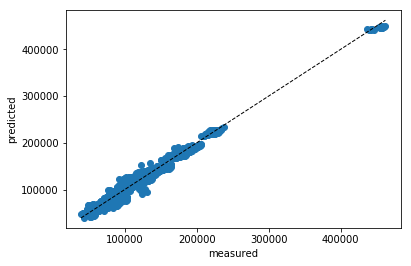

In [14]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_predicted)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=1)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [15]:
from sklearn import metrics
print('Mean Absolute Error of training data:', metrics.mean_absolute_error(Y_train, Y_predicted_train))  
print('Mean Squared Error of training data:', metrics.mean_squared_error(Y_train, Y_predicted_train))  
print('Root Mean Squared Error of training data:', np.sqrt(metrics.mean_squared_error(Y_train, Y_predicted_train)))

Mean Absolute Error: 5578.108219510384
Mean Squared Error: 51377888.29312416
Root Mean Squared Error: 7167.837072166481


In [16]:
from sklearn import metrics
print('Mean Absolute Error of test data:', metrics.mean_absolute_error(Y_test, Y_predicted))  
print('Mean Squared Error of test data:', metrics.mean_squared_error(Y_test, Y_predicted))  
print('Root Mean Squared Error of test data:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

Mean Absolute Error: 5637.382400805059
Mean Squared Error: 52844396.07372953
Root Mean Squared Error: 7269.415112217043


In [19]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg, X, Y, cv=10)
print(cv_results)

[0.95514266 0.96078898 0.98081125 0.98396077 0.97603822 0.98431353
 0.98222788 0.98060535 0.97013728 0.96494551]


In [20]:
np.mean(cv_results)

0.973897143088165

In [ ]:
cv_results = cross_val_score(reg, X, Y, cv=4)
print(cv_results)